# UX Diagram Agent (Google ADK Version)

__Author:__ Leslie A. McFarlin, Principal UX Architect

In [1]:
# General imports
import os
import sys
import uuid
from dotenv import load_dotenv
from google.genai import types

# Diagramming
from IPython.display import Image, display
from PIL import Image as im
from mermaid import Mermaid
import matplotlib.pyplot as plt

In [2]:
# Custom modules
sys.path.append("lib")

# Autoreload
%load_ext autoreload
%autoreload 2

# custom modules
from agent_diagram import mm, builder_tool_graph
from lib.config import APP_NAME
from lib.agents.taskflow_agent import agent_task_builder, session_service, memory_service, runner
from lib.tools.support import run_session, chat

App name mismatch detected. The runner is configured with app name "UX_TASKFLOW_BUILDER_APP", but the root agent was loaded from "C:\Users\lesli\OneDrive\Desktop\Python Projects\ux_diagram_agent\.venv\Lib\site-packages\google\adk\agents", which implies app name "agents".


## How This Agent Works

This agent takes natural language from a user and converts into a JSON that is then translated by tools into a diagram. That diagram is created via Mermaid.

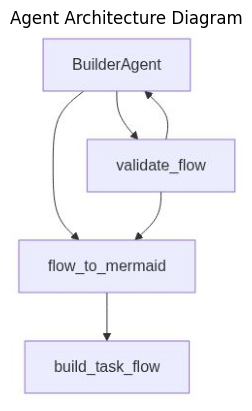

In [3]:
# Draw the Agent Architecture
mm(builder_tool_graph)

In [4]:
# USER_ID and SESSION_ID
USER_ID = str(uuid.uuid4())
SESSION_ID = str(uuid.uuid4())

I will define two local helper functions next to facilitate communications with the LLM. With this function, a user can interact directly with the agent from the notebook without having to pass all of the details for ```run_session()``` each time.

__How to Use Chat__

Call this after your initial query in the session (which should be done via ```await run_session()```)
1. Construct an input string. Example:
   ```
   # Input string
   user_input = """
   Create a simple user login flow. It should start with users landing on the login page.
   Then users should input either a username or email, and a password.
   If credentials are correct, the user logs into the system. If the credentials are incorrect, display an error.
   """
   ```
2. Pass the input string to chat. Example:
```
await chat(user_input)
```

This approach minimizes the load on the user, improving the user experience for Agent interactions via notebook.

In [5]:
# Wrapper for conversations
async def chat(query: str):
    '''
    Async wrapper for chat functionality to avoid always passing run_session arguments
    
    :param query: user inputs to the LLM agent
    :type query: str
    '''
    await run_session(
        runner_instance=runner,
        user_queries=query,
        session_service=session_service,
        memory_service=memory_service,
        user_id=USER_ID,
        session_id=SESSION_ID
)

In [6]:
# Test query
test_query = """
Build a simple user login flow. Start with the user landing on the login page. 
Then they should be entering their credentials.
If they are successful, they will be taken to a dashboard. If not successful, show an error.
"""

# To start, just use await run_session()
await run_session(
        runner_instance=runner,
        user_queries=test_query,
        session_service=session_service,
        memory_service=memory_service,
        user_id=USER_ID,
        session_id=SESSION_ID
)


##### Session: 0146322e-bad0-494c-b514-e60903f8403f
Session created for: UX_TASKFLOW_BUILDER_APP, 5447b541-a9f2-4d55-95e2-1beecf7b7687, 0146322e-bad0-494c-b514-e60903f8403f

User > 
Build a simple user login flow. Start with the user landing on the login page. 
Then they should be entering their credentials.
If they are successful, they will be taken to a dashboard. If not successful, show an error.

[2025-11-27T08:39:07] [query_start] user_id=5447b541-a9f2-4d55-95e2-1beecf7b7687 session_id=0146322e-bad0-494c-b514-e60903f8403f query=
Build a simple user login flow. Start with the user landing on the login page. 
Then they should be entering their credentials.
If they are successful, they will be taken to a dashboard. If not successful, show an error.

Model > I can build that flow for you. Before I create it, I have a quick question:

1. After an unsuccessful login attempt, should the user be allowed to retry, or should the flow end there?
[2025-11-27T08:39:09] [query_complete] user_i


##### Session: 0146322e-bad0-494c-b514-e60903f8403f
Session already exists for: UX_TASKFLOW_BUILDER_APP, 5447b541-a9f2-4d55-95e2-1beecf7b7687, 0146322e-bad0-494c-b514-e60903f8403f

User > 
After a failed login, display an error and allow for up to 3 retry attempts. Do a lockout after 3 attempts.

[2025-11-27T08:39:36] [query_start] user_id=5447b541-a9f2-4d55-95e2-1beecf7b7687 session_id=0146322e-bad0-494c-b514-e60903f8403f query=
After a failed login, display an error and allow for up to 3 retry attempts. Do a lockout after 3 attempts.



[2025-11-27T08:39:39] [query_complete] user_id=5447b541-a9f2-4d55-95e2-1beecf7b7687 session_id=0146322e-bad0-494c-b514-e60903f8403f query=
After a failed login, display an error and allow for up to 3 retry attempts. Do a lockout after 3 attempts.
 seconds=3.404 tool_called=False valid=None

========== TASK FLOW ==========
Title: User Login Flow

Validation:
    Valid: True
     No issues found.

Mermaid diagram:

flowchart TD
 start([User lands on login page])
 n1[User enters credentials]
 n2[System validates credentials]
 n3{Credentials valid?}
 n4([Navigate to dashboard])
 n5[Display login error]
 n6{Retry attempts exceeded?}
 n7([Lockout user])
 n8[User allowed to retry]
     start --> n1
     n1 --> n2
     n2 --> n3
     n3 -->|Yes| n4
     n3 -->|No| n5
     n5 --> n6
     n6 -->|Yes| n7
     n6 -->|No| n8
     n8 --> n1

Copy this into a Mermaid preview to see the diagram.
Mermaid diagram saved to: User_Login_Flow.mmd
PNG saved to User_Login_Flow.png
[2025-11-27T08:39:40] [query

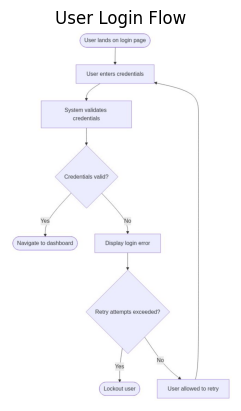

In [8]:
# Follow up chats - Uncomment and update if needed.
user_input = """
After a failed login, display an error and allow for up to 3 retry attempts. Do a lockout after 3 attempts.
"""

await chat(user_input)

In [9]:
# New diagram
await chat("Can you create a 'remember me' flow for login that we can add to the user login flow?")


##### Session: 0146322e-bad0-494c-b514-e60903f8403f
Session already exists for: UX_TASKFLOW_BUILDER_APP, 5447b541-a9f2-4d55-95e2-1beecf7b7687, 0146322e-bad0-494c-b514-e60903f8403f

User > Can you create a 'remember me' flow for login that we can add to the user login flow?
[2025-11-27T08:44:07] [query_start] user_id=5447b541-a9f2-4d55-95e2-1beecf7b7687 session_id=0146322e-bad0-494c-b514-e60903f8403f query=Can you create a 'remember me' flow for login that we can add to the user login flow?
Model > I can create a 'remember me' flow. Before I do, could you clarify how the 'remember me' functionality should behave?

1.  When the 'remember me' option is selected, should the system store the user's credentials securely, or should it use tokens?
2.  What happens if the user is already logged in and selects 'remember me'? Should it overwrite the existing session, or is it only applicable when logging in?
[2025-11-27T08:44:08] [query_complete] user_id=5447b541-a9f2-4d55-95e2-1beecf7b7687 sess


##### Session: 0146322e-bad0-494c-b514-e60903f8403f
Session already exists for: UX_TASKFLOW_BUILDER_APP, 5447b541-a9f2-4d55-95e2-1beecf7b7687, 0146322e-bad0-494c-b514-e60903f8403f

User > 
            Please use tokens. This should only be available while logging in.
            
[2025-11-27T08:45:45] [query_start] user_id=5447b541-a9f2-4d55-95e2-1beecf7b7687 session_id=0146322e-bad0-494c-b514-e60903f8403f query=
            Please use tokens. This should only be available while logging in.
            
[2025-11-27T08:45:53] [query_complete] user_id=5447b541-a9f2-4d55-95e2-1beecf7b7687 session_id=0146322e-bad0-494c-b514-e60903f8403f query=
            Please use tokens. This should only be available while logging in.
             seconds=7.505 tool_called=False valid=None

========== TASK FLOW ==========
Title: User Login Flow with Remember Me

Validation:
    Valid: True
     No issues found.

Mermaid diagram:

flowchart TD
 start([User lands on login page])
 n1[User enters credentia

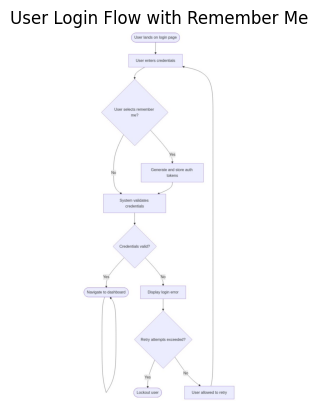

In [10]:
await chat ("""
            Please use tokens. This should only be available while logging in.
            """)